# Implementing SGD Linear Regressor

## 1.1 Importing necessary Libraries

In [0]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
%matplotlib inline
from numpy import random
import warnings
warnings.filterwarnings('ignore')

## 1.2 Importing and getting basic info about the dataset

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)
data = boston.data

## 1.3 Standardising and splitting the input 

In [0]:
# Standardising the data
sc = StandardScaler()
standardised_data = sc.fit_transform(data)
new_feature = np.ones(boston.data.shape[0])
final_data = np.vstack((new_feature,standardised_data.T)).T

# Getting actual prices of the house
target_price = boston.target

# Train and Test split of data
X_train, X_test, Y_train, Y_test = train_test_split(final_data, target_price, test_size = 0.3, random_state = 5)

## 1.4 Training SGDRegressor with necessary parameters

In [26]:
def SGD_Linear_Regressor(X_train,Y_train):
  # Number of epochs to run the model
  epoch = 1000

  #learning rate
  r = 0.001

  # Number of training points
  m = X_train.shape[0]

  # batch size
  batch = 20

  # Shuffle the input data by generating 'm' unique random numbers of range (0-m)
  random_ids = random.choice(m,m,replace=False)
  X_train_shuffled = X_train[random_ids,:]
  y_train_shuffled = Y_train[random_ids]

  #Create mini batches of size 20
  mini_batches = [(X_train_shuffled[i:i+batch,:], y_train_shuffled[i:i+batch]) for i in range(0, m, batch)]

  # Initialize the weight vector
  weight_vector = np.random.normal(0,1,final_data.shape[1])
  print(weight_vector)
  
  #temp weight matrix to store the intermediate weights
  temp_weights = np.zeros(final_data.shape[1])

  # converging the model
  while(epoch >=0):
      mean_weights = []
      for batch in mini_batches:
          X_batch = batch[0]
          Y_batch = batch[1]
          for j in range(0,final_data.shape[1]):
              intd_sum = 0
              for i in range(0,X_batch.shape[0]):
                  #  weight[j] = weight[j] - (r/m)*((Σfrom i=1 to K)of(((weight.T * final_data[i]) - target_price[i])* feature_data[i,j]) then  r /= 2
                  intd_sum += (((np.sum(sc.inverse_transform(weight_vector[1:14] * X_batch[i,1:])) + weight_vector[0]*X_batch[i,0]) - Y_batch[i]) * X_batch[i,j])
              temp_weights[j] = weight_vector[j] - ((r/X_batch.shape[0])*intd_sum)
          weight_vector = temp_weights
          mean_weights.append(weight_vector.mean())
      epoch -= 1 
  return weight_vector,mean_weights

# Get the final weight vector
final_weight_vector,mean_weights = SGD_Linear_Regressor(X_train,Y_train)

[ 0.54006448  0.99926257 -0.88724573 -1.75738542 -0.03202348  0.02710486
  1.06954151  1.33483576  0.77556327 -0.5021375  -1.21905008  1.08390898
 -0.8552094  -0.80845973]


## 1.5 Running the model on test data

In [0]:
# predicting the prices on test data
predictions = np.zeros(X_test.shape[0])
for i in range(0,X_test.shape[0]):
    predictions[i] = np.sum(sc.inverse_transform(final_weight_vector[1:14]*X_test[i,1:])) + final_weight_vector[0]*X_test[i,0]

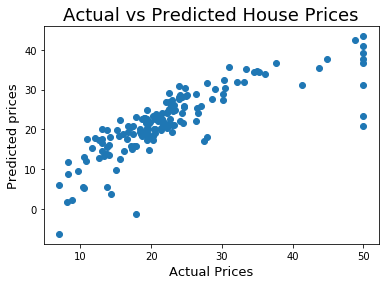

In [28]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
plt.scatter(Y_test, predictions)
plt.xlabel("Actual Prices",size = 13)
plt.ylabel("Predicted prices",size =13)
plt.title("Actual vs Predicted House Prices",size=18)
plt.show()

In [34]:
# MSE and RMSE of the above model
print("MSE : ",mean_squared_error(Y_test, predictions))
print("RMSE : ",np.sqrt(mean_squared_error(Y_test,predictions)))

MSE :  32.547744389980366
RMSE :  5.7050630487296425


# Applying SK-Learn's SGD model

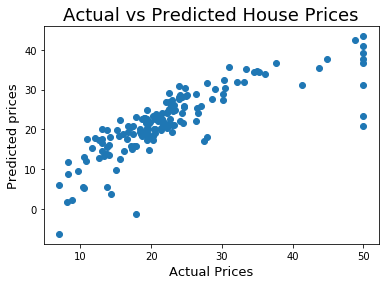

In [35]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=1000, eta0=0.001)
reg.fit(X_train, Y_train)

weight_vector_sklearn = reg.coef_ 
predictions_sk_learn = reg.predict(X_test)

plt.scatter(Y_test, predictions)
plt.xlabel("Actual Prices",size = 13)
plt.ylabel("Predicted prices",size =13)
plt.title("Actual vs Predicted House Prices",size=18)
plt.show()

In [36]:
# MSE and RMSE of the Sk-Learns Linear Regressor
print("MSE : ",mean_squared_error(Y_test, predictions_sk_learn))
print("RMSE : ",np.sqrt(mean_squared_error(Y_test,predictions_sk_learn)))

MSE :  31.775878180807624
RMSE :  5.637009684292517


# Comparing both models

In [43]:
# Sample predictions vs actual
print(f'Sample Actual vs Prediction Prices for custom built SGD: {list(zip(Y_test[:5], predictions[:5]))}')
print("==================================================================================================================================================================================================")
print(f'Sample Actual vs Prediction Prices for Scikit-Learn SGD: {list(zip(Y_test[:5], predictions_sk_learn[:5]))}')

Sample Actual vs Prediction Prices for custom built SGD: [(37.6, 36.81403425870519), (27.9, 31.570157875347604), (22.6, 27.000376378053943), (13.8, 5.3686609381355765), (35.2, 34.46748712360613)]
Sample Actual vs Prediction Prices for Scikit-Learn SGD: [(37.6, 37.12380533910163), (27.9, 30.15852320082727), (22.6, 27.228876596149192), (13.8, 5.72694614061106), (35.2, 33.72585369507483)]


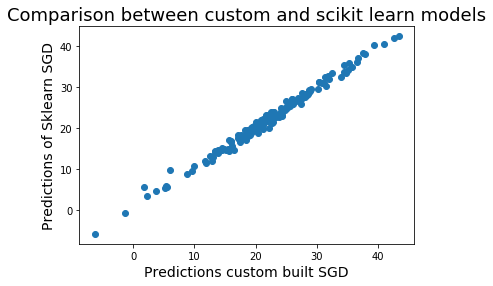

In [37]:
# Comparing the predictions of both models
plt.scatter(predictions, predictions_sk_learn)
plt.xlabel("Predictions custom built SGD",size=14)
plt.ylabel("Predictions of Sklearn SGD",size=14)
plt.title("Comparison between custom and scikit learn models",size=18)
plt.show()

# Obervations
Comparing the MSE and RMSE given by both models, we can say that with 1000 iterations, both models are giving almost the same performance.

In [38]:
from prettytable import PrettyTable
table = PrettyTable()

table.field_names = ['Model','MSE','RMSE']
table.add_row(["Custom built SGD","32.54","5.70"])
table.add_row(["Sk-Learns's SGD","31.77","5.63"])
print(table)

+------------------+-------+------+
|      Model       |  MSE  | RMSE |
+------------------+-------+------+
| Custom built SGD | 32.54 | 5.70 |
| Sk-Learns's SGD  | 31.77 | 5.63 |
+------------------+-------+------+
